In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## Descriptive Statistics

### I. Leximi i te dhenave ose keti DataFrame

In [3]:
ucl = pd.read_excel('UCL_playerstats_orig.xlsx')

In [4]:
ucl.head()

,PlayerID,Player,Position,Age,Nationality,Team,Competitions,Phase,Phase_Tier,Value10^6,...,Balls_recovered,Tackles_Won,Tackles_Lost,Saves,Goals_Conceded,Clean_Sheets,MOTM_Awards,Minutes_played,Match_played,DNP
0,1,Theo Hernandez,Defender,27,France,Milan,Serie A,Knockout_phase,D,40.0,...,53,2,5,0,0,0,0,861,10,0
1,2,Nicolo Barella,Midfielder,28,Italy,Inter,Serie A,Final,S,80.0,...,32,8,15,0,0,0,2,994,13,2
2,3,Lewandowski,Forward,36,Poland,Barcelona,La Liga,Semi_finals,A,15.0,...,11,4,1,0,0,0,2,985,13,1
3,4,Raphinha,Forward,28,Brazil,Barcelona,La Liga,Semi_finals,A,80.0,...,18,2,7,0,0,0,3,1225,14,0
4,5,Van Dijk,Defender,33,Netherlands,Liverpool FC,Premier League,Round16,C,50.0,...,51,3,3,0,0,0,0,840,9,1


#### II. **Mean** - metoda mean() – Ky osht mesatarja e numrave, dmth i mbledhim krejt vlerat edhe i ndajmë me sa copa jone.


In [4]:
mesatarja_age = ucl['Value10^6'].mean()

mesatarja_age

np.float64(39.68452380952381)

In [5]:
print("Mesatarja per DataFrame Tone:")
ucl.mean(numeric_only=True)

Mesatarja per DataFrame Tone:


PlayerID               105.500000
Age                     26.780952
Value10^6               39.684524
Jersey_Num              17.700000
Rating                   7.232667
Goals                    1.819048
Assists                  1.352381
TopSpeed(km/h)          32.495238
DistanceCovered(km)     85.780952
Total_attempts          12.661905
Dribbles                13.933333
Passes_completed       364.223810
Chances_Created         10.123810
Balls_recovered         29.719048
Tackles_Won              4.590476
Tackles_Lost             6.100000
Saves                    3.228571
Goals_Conceded           1.266667
Clean_Sheets             0.276190
MOTM_Awards              0.619048
Minutes_played         798.100000
Match_played            10.380952
DNP                      1.619048
dtype: float64

#### III. **Median** - metoda median() – Ky na jep numrin e mesEm pasi i renditim numrat. Nese ka numra qift, marrim mesataren e dy te  mesmeve.


In [6]:
median_value = ucl['Value10^6'].median()

print(f"Median Value of Player: {median_value}")

Median Value of Player: 30.0


#### IV. **Mode** -  Metoda `mode()` per te dhenat numerike tregon se numri 25 del ma shpesh se krejt tjert dmth Numri ma i shpeshte per Value^6 eshte 25. Me nje Fjale kallxon qat numrin ma te shpeshin



In [7]:
mode_class = ucl['Value10^6'].mode().values[0]
print(f"Mode Class: {mode_class}")

Mode Class: 25.0


#### V. Masat e Shperndarjes **(Measures of Dispersion)**
##### Llogaritni variancen dhe devijimin standard pEr variablat sasiorë si mosha(Age) dhe Goals etj.

In [8]:
age_variance = ucl['Age'].var

print(age_variance)

<bound method Series.var of 0      27
1      28
2      36
3      28
4      33
       ..
205    22
206    35
207    27
208    26
209    26
Name: Age, Length: 210, dtype: int64>


In [9]:
goals_std = ucl['Goals'].std()

print(f'Devijimi standard i Golave: {goals_std}')


Devijimi standard i Golave: 2.430984018696335


In [10]:
dribbles_std = ucl['Dribbles'].std()
print(f'Devijimi standard i Dribbleve: {round(dribbles_std, 3)}')

Devijimi standard i Dribbleve: 16.274


In [11]:
ucl.select_dtypes(include='object').describe()

,Player,Position,Nationality,Team,Competitions,Phase,Phase_Tier
count,210,210,210,210,210,210,210
unique,210,4,44,32,15,8,6
top,Theo Hernandez,Midfielder,France,Inter,Serie A,Round16,C
freq,1,66,24,13,38,58,58


#### VI. Shperndarja e frekuencave(Frequency Distribution)
##### Ketu do krijojme histogram për të vizualizuar shperndarjen e frekuencave sasiore si mosha(Age) dhe Goals  Assists etj.

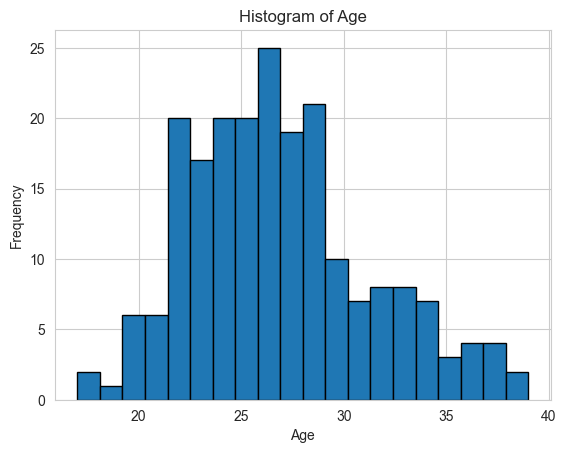

In [12]:
plt.hist(ucl['Age'], bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

In [13]:
fig = px.histogram(ucl, x='Age', nbins=30, title="Histogram of Age",color_discrete_sequence=['blue'])
fig.update_layout(xaxis_title="Age", yaxis_title="Frequency")
fig.show()

In [14]:
barcelonateam = ucl[ucl['Team'] == 'Barcelona']
barcelonateam['Goals'].sum()

np.int64(37)

#### Cila kombëtare ka pasur mesatarisht më shumë "Top Speed"?

In [15]:
ucl.groupby('Nationality')['TopSpeed(km/h)'].mean().sort_values(ascending=False).head(10)

Nationality
South Korea    35.000000
Austria        34.500000
Egypt          34.500000
Sweden         34.500000
Hungary        34.500000
Ecuador        34.300000
Ivory Coast    34.300000
Canada         34.233333
Morocco        34.033333
Ghana          33.900000
Name: TopSpeed(km/h), dtype: float64

#### Sa gola mesatarisht bëjnë lojtarët sipas pozicionit?

In [16]:
ucl.groupby('Position')['Goals'].mean().sort_values(ascending=False)

Position
Forward       3.968750
Midfielder    1.287879
Defender      0.716667
Goalkeeper    0.000000
Name: Goals, dtype: float64

#### Top Scoring Teams🛡️

In [17]:
topscoring_teams = (ucl.groupby('Team')['Goals'].sum().sort_values(ascending=False).reset_index().head(10))
topscoring_teams

,Team,Goals
0,Barcelona,37
1,Paris SG,31
2,BVB Dortmund,28
3,Bayern Munich,27
4,Arsenal FC,24
5,Inter,22
6,Real Madrid,19
7,Benfica,18
8,PSV Eindhoven,18
9,Atletico Madrid,17


In [18]:
fig = px.bar(
    topscoring_teams.sort_values(by='Goals',ascending=True ),  # e rendisim për grafik horizontal
    x='Goals',
    y='Team',
    title='Top Scoring Teams Champions League 2025 ⭐🏆',
    text='Goals',
)
fig.update_traces(marker_color='steelblue', textposition='inside')

fig.update_layout(
    plot_bgcolor='white',
    xaxis_title='Goals',
    yaxis_title='Team',
    showlegend=False
)

fig.show()

#### Goal+Assist = Total Contributions

In [19]:
ucl['GoalsContributions'] = ucl['Goals'] + ucl['Assists']

top_contrib_teams = (
    ucl.groupby('Team')['GoalsContributions']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

top_contrib_teams

,Team,GoalsContributions
0,Barcelona,68
1,Paris SG,62
2,BVB Dortmund,45
3,Bayern Munich,44
4,Inter,39
5,Arsenal FC,39
6,Real Madrid,35
7,Atalanta BC,31
8,Atletico Madrid,31
9,PSV Eindhoven,30


In [20]:
top_player_barcelona = barcelonateam.groupby('Player')[['Age','Goals']].sum().sort_values(by='Goals', ascending=False)
top_player_barcelona

,Age,Goals
Player,,
Raphinha,28,13
Lewandowski,36,11
Yamal,17,5
Ferran Torres,25,3
Inigo Martinez,33,2
Dani Olmo,27,2
Fermin Lopez,22,1
Casado,21,0
Balde,21,0


In [21]:
fig = px.histogram(ucl, x='Goals', y='Team', nbins=30, title="Teams that have scored the most goals in the Champions League 2025",color_discrete_sequence=['blue'])
fig.update_layout(xaxis_title="Goals", yaxis_title="Teams")
fig.show()

In [22]:
fig = px.bar(ucl, x='Team', y='Goals', text='Player', title="Teams that have scored the most goals in the Champions League 2025",
             color='Goals', color_continuous_scale='Blues')

fig.update_layout(xaxis_title="Team", yaxis_title="Goals Scored")
fig.show()

#### VII. Tabelat e numrimeve(Frequency Table)

In [23]:
teams_players = ucl[['Team']].value_counts()

teams_players

Team            
Inter               13
Arsenal FC          12
Paris SG            12
Barcelona           12
BVB Dortmund        11
PSV Eindhoven       10
Liverpool FC        10
Bayern Munich       10
Real Madrid         10
Atalanta BC          9
Benfica              9
Atletico Madrid      8
Aston Villa          8
Bayer Leverkusen     7
Monaco               7
Manchester City      7
Milan                7
Lille                6
Celtic               6
Sporting CP          6
Juventus             5
Club Brugge          5
Bologna              4
Feyenoord            4
Shakhtar Donetsk     3
VfB Stuttgart        2
Brest                2
Dinamo Zagreb        1
Girona               1
Leipzig              1
Real Madrid          1
Sturm Graz           1
Name: count, dtype: int64

In [24]:
unique_teams_ucl = pd.Series(ucl['Team'].unique(),name='Teams')
unique_teams_ucl


0                Milan
1                Inter
2            Barcelona
3         Liverpool FC
4          Real Madrid
5           Arsenal FC
6          Club Brugge
7              Benfica
8               Celtic
9      Atletico Madrid
10            Paris SG
11       PSV Eindhoven
12              Brest 
13              Lille 
14        Real Madrid 
15    Bayer Leverkusen
16     Manchester City
17        BVB Dortmund
18           Juventus 
19         Aston Villa
20         Atalanta BC
21             Leipzig
22          Sturm Graz
23              Monaco
24       Bayern Munich
25         Sporting CP
26           Feyenoord
27             Bologna
28    Shakhtar Donetsk
29       VfB Stuttgart
30       Dinamo Zagreb
31              Girona
Name: Teams, dtype: object

In [25]:
# Filtrimi i lojtarëve mbi moshen 30
players_aged = ucl[(ucl['Age'] > 30) & (ucl['Position'] != 'Goalkeeper')]

players_aged

,PlayerID,Player,Position,Age,Nationality,Team,Competitions,Phase,Phase_Tier,Value10^6,...,Tackles_Won,Tackles_Lost,Saves,Goals_Conceded,Clean_Sheets,MOTM_Awards,Minutes_played,Match_played,DNP,GoalsContributions
2,3,Lewandowski,Forward,36,Poland,Barcelona,La Liga,Semi_finals,A,15.0,...,4,1,0,0,0,2,985,13,1,11
4,5,Van Dijk,Defender,33,Netherlands,Liverpool FC,Premier League,Round16,C,50.0,...,3,3,0,0,0,0,840,9,1,1
8,9,Hans Vanaken,Midfielder,32,Belgium,Club Brugge,Pro League,Round16,C,7.0,...,4,9,0,0,0,1,1080,12,0,2
9,10,Otamendi,Defender,37,Argentina,Benfica,Liga Portugal,Round16,C,1.0,...,17,14,0,0,0,0,1080,12,0,1
36,37,Calhanoglu,Midfielder,31,Turkey,Inter,Serie A,Final,S,50.0,...,8,8,0,0,0,1,835,12,3,6
46,47,Taremi,Forward,32,Iran,Inter,Serie A,Final,S,5.0,...,7,4,0,0,0,1,715,12,3,5
47,48,Griezmann,Forward,34,France,Atletico Madrid,La Liga,Round16,C,22.0,...,5,3,0,0,0,3,732,10,0,9
62,63,Di Maria,Forward,37,Argentina,Benfica,Liga Portugal,Round16,C,3.0,...,3,3,0,0,0,2,547,9,3,3
66,67,Stefan de Vrij,Defender,33,Netherlands,Inter,Serie A,Final,S,7.0,...,4,2,0,0,0,0,688,9,6,0
70,71,Modric,Midfielder,39,Croatia,Real Madrid,La Liga,Quarter_finals,B,5.0,...,5,12,0,0,0,0,647,14,0,3


In [26]:
players_aged_sorted = players_aged[['Player','Age','Team','Position','Goals','Minutes_played','Match_played']].sort_values(by='Match_played', ascending=False)

players_aged_sorted.head(20)

,Player,Age,Team,Position,Goals,Minutes_played,Match_played
70,Modric,39,Real Madrid,Midfielder,0,647,14
2,Lewandowski,36,Barcelona,Forward,11,985,13
72,Pascal Gross,33,BVB Dortmund,Midfielder,1,918,13
94,Mkhitaryan,36,Inter,Midfielder,0,856,13
144,Harry Kane,31,Bayern Munich,Forward,11,1120,13
78,Emre Can,31,BVB Dortmund,Midfielder,2,940,12
9,Otamendi,37,Benfica,Defender,1,1080,12
36,Calhanoglu,31,Inter,Midfielder,4,835,12
8,Hans Vanaken,32,Club Brugge,Midfielder,1,1080,12
169,Partey,31,Arsenal FC,Midfielder,0,899,12


In [27]:
fig = px.bar(
    players_aged_sorted.head(20),
    x='Player',
    y='Match_played',
    color='Goals',
    hover_data=['Age', 'Team', 'Position'],
    title='Players over 30 (not goalkeepers) with the most matches played and their goals',
    text='Match_played'
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [28]:
goals_per_player = ucl.groupby(['Player', 'Position','Team'])['Goals'].sum().reset_index()
goals_per_player = goals_per_player.sort_values(by='Goals', ascending=False).head(20)
fig2 = px.pie(goals_per_player,
              values='Goals',
              names='Player',
              title='Top 20 lojtaret me me se shumti gola ne Champions League 2025',
              hover_data=['Position'])
fig2.update_traces(textposition='inside', textinfo='label+value', textfont_size=16)
fig2.show()

In [29]:
ucl['Competitions'] = ucl['Competitions'].str.strip()

In [30]:
teams_per_comp = ucl.groupby(['Competitions'])['Team'].nunique().sort_values(ascending=False)

print(teams_per_comp)

Competitions
Bundesliga        5
La Liga           5
Serie A           5
Ligue 1           4
Premier League    4
Eredivisie        2
Liga Portugal     2
ABundesliga       1
Premier Liga      1
Premiership       1
Pro League        1
SuperSport HNL    1
Name: Team, dtype: int64


In [31]:
teams_ucl = teams_per_comp.reset_index()
teams_ucl.columns = ['Competitions', 'Num_Teams']

fig = px.bar(teams_ucl, x='Competitions', y='Num_Teams',
             title='Number of teams🛡️ in the Champions League⚽🏆 by Competition',
             color='Num_Teams', text='Num_Teams')
fig.show()

In [32]:
position_counts = ucl['Position'].value_counts()

fig = px.bar(position_counts, title="Moda e Pozicioneve të Lojtarëve")
fig.show()

In [33]:
# Filtrimi i lojtarëve që kanë luajtur (p.sh. më shumë se 0 minuta)
played = ucl[ucl['Minutes_played'] > 0]

In [34]:
# Grupi i kompeticioneve që kanë të paktën 3 skuadra
valid_competitions = played.groupby('Competitions')['Team'].transform('nunique') >= 3
filtered = played[valid_competitions]

filtered

,PlayerID,Player,Position,Age,Nationality,Team,Competitions,Phase,Phase_Tier,Value10^6,...,Tackles_Won,Tackles_Lost,Saves,Goals_Conceded,Clean_Sheets,MOTM_Awards,Minutes_played,Match_played,DNP,GoalsContributions
0,1,Theo Hernandez,Defender,27,France,Milan,Serie A,Knockout_phase,D,40.0,...,2,5,0,0,0,0,861,10,0,0
1,2,Nicolo Barella,Midfielder,28,Italy,Inter,Serie A,Final,S,80.0,...,8,15,0,0,0,2,994,13,2,2
2,3,Lewandowski,Forward,36,Poland,Barcelona,La Liga,Semi_finals,A,15.0,...,4,1,0,0,0,2,985,13,1,11
3,4,Raphinha,Forward,28,Brazil,Barcelona,La Liga,Semi_finals,A,80.0,...,2,7,0,0,0,3,1225,14,0,22
4,5,Van Dijk,Defender,33,Netherlands,Liverpool FC,Premier League,Round16,C,50.0,...,3,3,0,0,0,0,840,9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,205,Kenny Lala,Defender,33,France,Brest,Ligue 1,Knockout_phase,D,2.0,...,1,1,0,0,0,0,720,8,2,0
206,207,Cabella,Midfielder,35,France,Lille,Ligue 1,Round16,C,3.0,...,3,4,0,0,0,0,388,7,3,2
207,208,Locatelli,Midfielder,27,Italy,Juventus,Serie A,Knockout_phase,D,35.0,...,19,17,0,0,0,0,673,9,1,0
208,209,Palacios,Midfielder,26,Argentina,Bayer Leverkusen,Bundesliga,Round16,C,40.0,...,10,13,0,0,0,0,666,10,0,0


In [35]:
avg_distance = filtered.groupby('Competitions')['DistanceCovered(km)'].mean().reset_index()

avg_distance

,Competitions,DistanceCovered(km)
0,Bundesliga,90.983871
1,La Liga,81.846875
2,Ligue 1,100.281481
3,Premier League,83.632432
4,Serie A,72.344737


In [36]:
avg_distance = avg_distance.sort_values(by='DistanceCovered(km)', ascending=False)
avg_distance['DistanceCovered(km)'] = avg_distance['DistanceCovered(km)'].round(1)

In [37]:
fig = px.bar(
    avg_distance,
    x='Competitions',
    y='DistanceCovered(km)',
    title='Average distance per Competition Champions League⚽🏆 2025 Season',
    text='DistanceCovered(km)',
    color='DistanceCovered(km)',
    color_continuous_scale='Blues'
)
fig.update_traces(texttemplate='%{text} km', textposition='inside')
fig.show()

#### Defensive Contribution: Tackles and Ball Recoveries

In [38]:
top_defenders = (
    ucl[['Player','Position','Balls_recovered', 'Tackles_Won']]
    .sort_values(by='Balls_recovered', ascending=False)
    .head(20)
)

top_defenders


,Player,Position,Balls_recovered,Tackles_Won
139,Pacho,Defender,124,5
161,Marquinhos,Defender,109,10
129,Nuno Mendes,Defender,87,23
132,Minjae Kim,Defender,87,7
175,Joao Neves,Midfielder,87,19
79,Alexsandro Ribeiro,Defender,86,2
9,Otamendi,Defender,85,17
85,Upamecano,Defender,82,9
99,Schlotterbeck,Defender,76,19
12,Hakimi,Defender,74,11


In [39]:
top_defenders['PlayerTag'] = top_defenders['Player'] + " (" + top_defenders['Position'] + ")"

top_defenders

,Player,Position,Balls_recovered,Tackles_Won,PlayerTag
139,Pacho,Defender,124,5,Pacho (Defender)
161,Marquinhos,Defender,109,10,Marquinhos (Defender)
129,Nuno Mendes,Defender,87,23,Nuno Mendes (Defender)
132,Minjae Kim,Defender,87,7,Minjae Kim (Defender)
175,Joao Neves,Midfielder,87,19,Joao Neves (Midfielder)
79,Alexsandro Ribeiro,Defender,86,2,Alexsandro Ribeiro (Defender)
9,Otamendi,Defender,85,17,Otamendi (Defender)
85,Upamecano,Defender,82,9,Upamecano (Defender)
99,Schlotterbeck,Defender,76,19,Schlotterbeck (Defender)
12,Hakimi,Defender,74,11,Hakimi (Defender)


In [40]:
fig = go.Figure()
fig.add_trace(go.Bar(
    y=top_defenders['PlayerTag'],
    x=top_defenders['Balls_recovered'],
    name='Balls Recovered',
    orientation='h',
    marker_color='lightblue',
    text=top_defenders['Balls_recovered'],
    textposition='inside'
))

fig.add_trace(go.Bar(
    y=top_defenders['PlayerTag'],
    x=top_defenders['Tackles_Won'],
    name='Tackles Won',
    orientation='h',
    marker_color='steelblue',
    text=top_defenders['Tackles_Won'],
    textposition='inside'
))

fig.update_layout(
    title='Most Tackles and Ball Recovers in Champions League 2025',
    xaxis_title='Count',
    yaxis_title='Players ',
    barmode='overlay',
    plot_bgcolor='white',
    bargap=0.2,
    height=700
)

fig.show()


In [41]:
ucl['Distance_per_match'] = ucl['DistanceCovered(km)'] / ucl['Match_played']

In [42]:
position_stats = (
    ucl.groupby('Position')[['Distance_per_match', 'TopSpeed(km/h)']]
    .mean()
    .round(2)
    .sort_values(by='Distance_per_match', ascending=False)
    .reset_index()
)

position_stats

,Position,Distance_per_match,TopSpeed(km/h)
0,Midfielder,9.39,32.45
1,Defender,8.56,33.36
2,Forward,7.94,33.56
3,Goalkeeper,4.96,26.64


####  top 10 players in Champions League 2025 with the most goals and assists

In [69]:
ucl['GoalsContributions'] = ucl['Goals'] + ucl['Assists']

In [114]:
# Group by player name and calculate the total goals scored and assists by players
player_goalscontributions = ucl.groupby('Player')['GoalsContributions'].sum().sort_values(ascending=False)

In [115]:
best_player_ucl = player_goalscontributions.idxmax()

In [116]:
best_player_ucl

'Raphinha'

In [117]:
# Display the goal count for top 10 players
top_10_players = player_goalscontributions.head(15)
top_10_players

Player
Raphinha             22
Guirassy             17
Dembele              14
Harry Kane           13
Lewandowski          11
Vinicius Jr          11
Pavlidis             10
Desire Doue          10
Griezmann             9
Hakimi                9
Charles Ketelaere     9
Kylian Mbappe         9
Jonathan David        9
Lautaro Martinez      9
Julian Alvarez        8
Name: GoalsContributions, dtype: int64

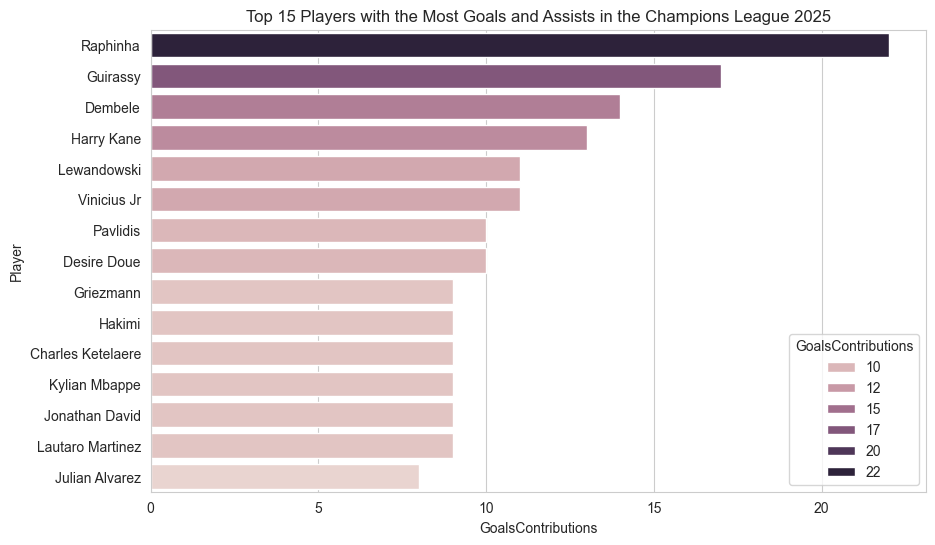

In [120]:
# Create a bar chart for the top 10 players
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_players, y=top_10_players.index,hue=top_10_players)
plt.xlabel('GoalsContributions')
plt.ylabel('Player')
plt.title('Top 15 Players with the Most Goals and Assists in the Champions League 2025')
plt.show()

In [8]:
#grouping teams together
topscoring_teams = ucl.groupby('Team')['Goals'].sum().sort_values(ascending=False).reset_index().rename(columns={'Goals':'Total Goals'})


#sorting by goals scored
topscoring_teams.sort_values(by='Total Goals',ascending=False,inplace=True)

In [11]:
topscoring_teams.head(5)

,Team,Total Goals
0,Barcelona,37
1,Paris SG,31
2,BVB Dortmund,28
3,Bayern Munich,27
4,Arsenal FC,24


### Minutes played by Age in Champions League 2025

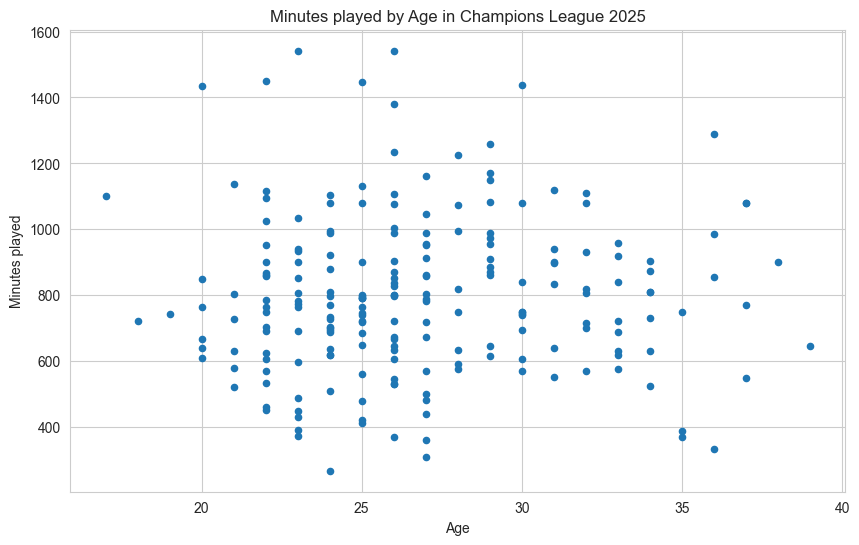

In [16]:
age_mins = ucl[['Player','Age','Minutes_played']]

age_mins.plot.scatter(x='Age',y='Minutes_played',figsize=(10,6))
plt.xlabel('Age')
plt.ylabel('Minutes played')
plt.title('Minutes played by Age in Champions League 2025')
plt.show()

#### Total Goals Scored in Champions League 2025

In [9]:
totals_goals_ucl25 = ucl.groupby('Team')['Goals'].sum().sort_values(ascending=False).sum()

print(f'Total Goals Scored in Champions League 2025: {totals_goals_ucl25}')

Total Goals Scored in Champions League 2025: 382


### Best Goaleeper in Champions League 2025

In [35]:
## Best Goalkeeper in Champions League based in Player,Team,Clean_Sheets,Saves
best_goalkeeper = ucl[ucl['Position'] == 'Goalkeeper'].sort_values(by='Saves', ascending=False).head(1)
best_goalkeeper[['Player','Position', 'Team', 'Clean_Sheets', 'Saves']]


,Player,Position,Team,Clean_Sheets,Saves
112,Yann Sommer,Goalkeeper,Inter,7,54


#### Strikers with 9 Jersey Number

In [36]:
strikers_9 = ucl[(ucl['Jersey_Num'] == 9) & (ucl['Goals'] > 0)]

In [46]:
strikers_9 = strikers_9[['Player', 'Team', 'Jersey_Num', 'Goals']].sort_values(by='Goals', ascending=False)

In [48]:
fig = px.bar(
    strikers_9,
    x='Player',
    y='Goals',
    color='Team',
    title='Players With Jersey Number 9 Who Scored Goals in Champions League 2025',
    text='Goals'
)

fig.show()

### Descriptive & Statistics complete✅